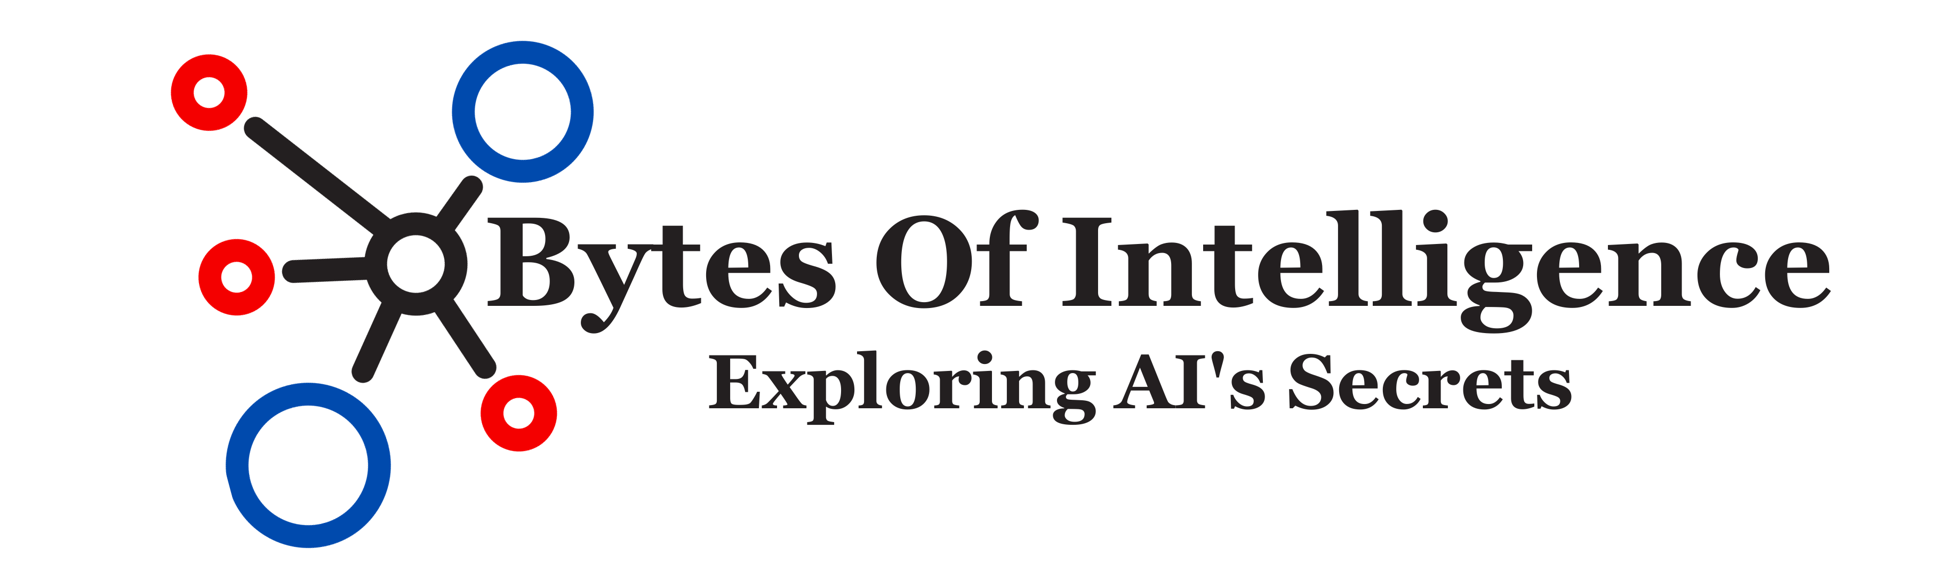
<center><h1>Chapter 03: AutoGrad Different Coding Examples</h1></center>

In [14]:
import torch
x = torch.ones(2, 2, requires_grad=True)
print(f"Tensor Datastes is : \n{x}\n")
y = x + 2
print(f"Tensor Additions Datastes is : \n{y}\n")
print(f"Gradient Operations on Given input Tensor : \n{y.grad_fn}")
z = y * y * 3
output_value = z.mean()
print(f"Tensor Datastes Mean Result: \n{output_value}\n")
output_value.backward()
print(f"Gradien of Tensor Datastes is : \n{x.grad}\n")

Tensor Datastes is : 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

Tensor Additions Datastes is : 
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

Gradient Operations on Given input Tensor : 
Tensor Datastes Mean Result: 
27.0

Gradien of Tensor Datastes is : 
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])



In [16]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
print(f"Tensor Datastes is : \n{x}\n")
y = 2 * torch.pow(x, 2) + 3*x + 1 # x** || 2x^2 + 3x + 1
print(f"Tensor Power Operations Datastes is : \n{y}\n")
y.backward(torch.tensor([1.0, 1.0,1.0, 1.0]))
print(f"Gradien of Tensor Datastes is : \n{x.grad}\n")

Tensor Datastes is : 
tensor([1., 2., 3., 4.], requires_grad=True)

Tensor Power Operations Datastes is : 
tensor([ 6., 15., 28., 45.], grad_fn=<AddBackward0>)

Gradien of Tensor Datastes is : 
tensor([ 7., 11., 15., 19.])



In [17]:
import torch
class customAutoGrad(torch.autograd.Function):
    @staticmethod
    def forward(customTensor, input):
        customTensor.save_for_backward(input)
        return input.clamp(min = 0)

    @staticmethod
    def backward(customTensor, output):
        input,  = customTensor.saved_tensors
        gradient_input = output.clone()
        gradient_input[input < 0] = 0
        return gradient_input
    
datatype = torch.float
device = torch.device("cpu")
x = torch.tensor([-1, -0.1, 0.1, 1],
                 device = device, 
                 dtype = datatype,
                 requires_grad=True)
print(f"Tensor Datastes is : \n{x}\n")
y = customAutoGrad.apply(x)
y.sum().backward()
print(f"Gradien of Tensor Datastes is : \n{x.grad}\n")

Tensor Datastes is : 
tensor([-1.0000, -0.1000,  0.1000,  1.0000], requires_grad=True)

Gradien of Tensor Datastes is : 
tensor([0., 0., 1., 1.])



### Simple Linear Model
y = mx + c

y = dependent Variable

x = independent variable

m = weight/ slope / cofficient

c = bias

In [20]:
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad = True)
w = torch.tensor([[1.0], [2.0]], requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

y_predicted = x.mm(w) + b

y_actual = torch.tensor([[5.0], [11.0]])
loss = (y_predicted - y_actual).pow(2).mean()
loss.backward()

print(f"Weight Value is : \n{w.grad}")
print(f"Bias Value is : {b.grad}")

Weight Value is : 
tensor([[4.],
        [6.]])
Bias Value is : 2.0


In [28]:
import torch
import torch.nn.functional as F

x = torch.randn(1, 10, requires_grad=True)
print(f"Tensor Datastes is : \n{x}\n")
y_actual = torch.randn(1, 5)

weight01 = torch.rand(10, 5, requires_grad=True)
print(f"weight 01 Datastes is : \n{weight01}\n")
weight02 = torch.rand(5, 5, requires_grad=True)
print(f"weight 02 Datastes is : \n{weight02}\n")

bias01 = torch.randn(1, 5, requires_grad=True)
print(f"Bias 01 Datastes is : \n{bias01}\n")
bias02 = torch.randn(1, 5, requires_grad=True)
print(f"Bias 02 Datastes is : \n{bias02}\n")

activation = F.relu(x.mm(weight01) + bias01)
y_predicted = activation.mm(weight02) + bias02

loss = (y_predicted - y_actual).pow(2).mean()
loss.backward()
print(f"Weight 01 Value is : \n{weight01.grad}")
print(f"Bias 01 Value is : {bias01.grad}")

print(f"Weight 02 Value is : \n{weight02.grad}")
print(f"Bias 02 Value is : {bias02.grad}")

Tensor Datastes is : 
tensor([[-0.3544, -0.6695, -0.1313, -1.0693, -0.9082,  1.9815,  1.1161,  1.7360,
         -0.4470, -1.4239]], requires_grad=True)

weight 01 Datastes is : 
tensor([[0.5067, 0.3656, 0.3088, 0.2255, 0.7467],
        [0.4320, 0.7515, 0.2461, 0.5170, 0.6644],
        [0.3440, 0.6272, 0.8508, 0.0046, 0.8917],
        [0.1669, 0.8527, 0.1825, 0.0664, 0.4176],
        [0.8330, 0.8578, 0.6978, 0.0071, 0.4919],
        [0.3578, 0.7436, 0.1166, 0.8712, 0.1606],
        [0.1487, 0.0984, 0.4580, 0.4242, 0.3690],
        [0.2963, 0.4474, 0.0164, 0.9390, 0.7078],
        [0.3743, 0.3586, 0.0996, 0.3146, 0.2484],
        [0.8789, 0.4822, 0.4537, 0.7052, 0.0750]], requires_grad=True)

weight 02 Datastes is : 
tensor([[0.5637, 0.7404, 0.0064, 0.3142, 0.9951],
        [0.9891, 0.3318, 0.1180, 0.8761, 0.8544],
        [0.5930, 0.3022, 0.1769, 0.3334, 0.6713],
        [0.0190, 0.0937, 0.7680, 0.9873, 0.6625],
        [0.9404, 0.4851, 0.7600, 0.8656, 0.8733]], requires_grad=True)

Bia